# Classifying Fashion-MNIST

Now it's your turn to build and train a neural network. You'll be using the [Fashion-MNIST dataset](https://github.com/zalandoresearch/fashion-mnist), a drop-in replacement for the MNIST dataset. MNIST is actually quite trivial with neural networks where you can easily achieve better than 97% accuracy. Fashion-MNIST is a set of 28x28 greyscale images of clothes. It's more complex than MNIST, so it's a better representation of the actual performance of your network, and a better representation of datasets you'll use in the real world.

In this notebook, you'll build your own neural network. 

In [1]:
import torch
from torchvision import datasets, transforms
import helper

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Here we can see one of the images.

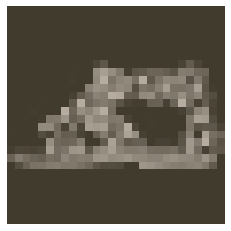

In [2]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

In [3]:
# Network architecture.

from torch import nn, optim
import torch.nn.functional as F

model = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
            nn.LogSoftmax(dim=1)
        )

print(model)


Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=64, bias=True)
  (5): ReLU()
  (6): Linear(in_features=64, out_features=10, bias=True)
  (7): LogSoftmax(dim=1)
)


# Train the network

In [4]:
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [5]:
# Training the network.

epochs = 15

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
    else:
        print(f"Training loss: {running_loss/len(trainloader)}")        

Training loss: 0.5193355804059043
Training loss: 0.391364349771156
Training loss: 0.3540137001891126
Training loss: 0.3318180482445368
Training loss: 0.31557746037745527
Training loss: 0.3021811648869692
Training loss: 0.2943737499797141
Training loss: 0.28059691143855614
Training loss: 0.2730604246107818
Training loss: 0.2657000090378815
Training loss: 0.26278182967448793
Training loss: 0.2517578973651314
Training loss: 0.24982237202653498
Training loss: 0.24137924024974233
Training loss: 0.23326594525896538


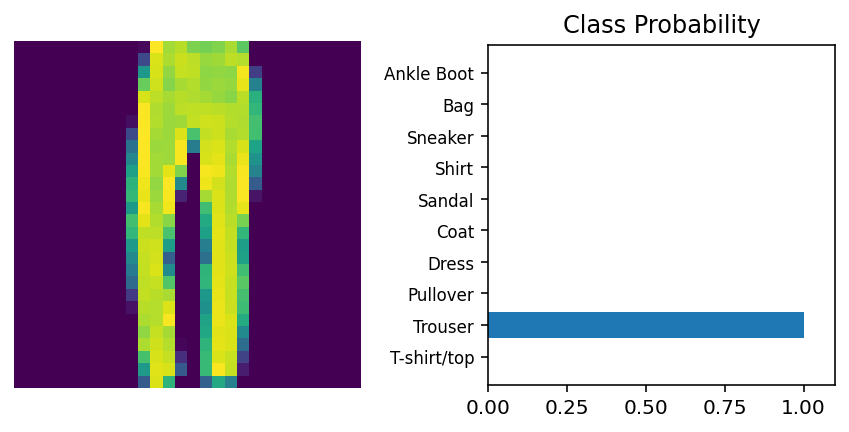

In [8]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

# Testing out.

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

img = img.resize_(1, 784)

ps = torch.exp(model(img))

# Plotting
helper.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')